Universidad del valle de Guatemala</br>
Facultad de Ingeniería</br>
Departamento de ciencias de la Computación</br>
Inteligencia Artificial

Grupo # 5

Gabriel Vicente 2049

# Laboratorio 8: Mixture Models y Segmentación de Clientes de Banco</br>
Deberá construir un modelo basado en aprendizaje no supervisado para el dataset dado. Lo que se busca con este modelo es poder segmentar a clientes de una entidad bancaria para poder así tomar decisiones a nivel comercial y potenciar las operaciones de la empresa

In [22]:
import pandas as pd 
import seaborn as sns 

df = pd.read_csv('./CSV/bank_transactions.csv')
display(df.describe())

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1.046198e+06,1.048567e+06,1.048567e+06
mean,1.154035e+05,1.570875e+05,1.574335e+03
std,8.464854e+05,5.126185e+04,6.574743e+03
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.721760e+03,1.240300e+05,1.610000e+02
50%,1.679218e+04,1.642260e+05,4.590300e+02
75%,5.765736e+04,2.000100e+05,1.200000e+03
max,1.150355e+08,2.359590e+05,1.560035e+06


## Análisis exploratorio breve

In [23]:
from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title='Informe de perfil de datos', explorative=True)
# profile

'Número de filas:'

1048567

'Número de columnas:'

9

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

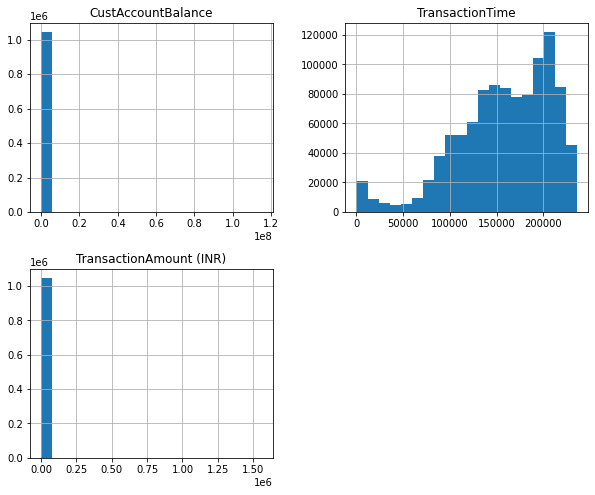

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
CustAccountBalance,1.000000,-0.004094,0.062623
TransactionTime,-0.004094,1.000000,0.007915
TransactionAmount (INR),0.062623,0.007915,1.000000


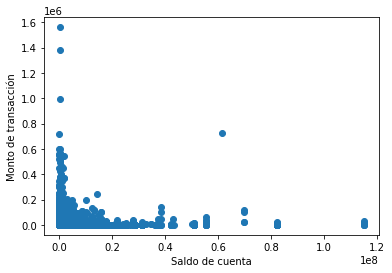

In [24]:
import matplotlib.pyplot as plt


display("Número de filas:", df.shape[0])
display("Número de columnas:", df.shape[1])


display(df.isnull().sum())

df.hist(bins=20, figsize=(10,8))
plt.show()


display(df.corr())

plt.scatter(df['CustAccountBalance'], df['TransactionAmount (INR)'])
plt.xlabel('Saldo de cuenta')
plt.ylabel('Monto de transacción')
plt.show()




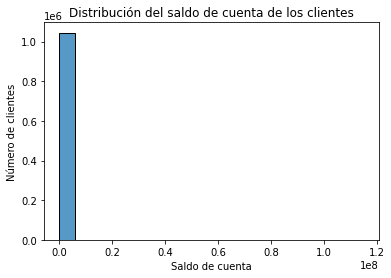

In [25]:
sns.histplot(data=df, x='CustAccountBalance', bins=20)
plt.xlabel('Saldo de cuenta')
plt.ylabel('Número de clientes')
plt.title('Distribución del saldo de cuenta de los clientes')
plt.show()

# Limpieza de datos

In [26]:
from sklearn.preprocessing import LabelEncoder
df = df.dropna()
le = LabelEncoder()
df['CustLocation'] = le.fit_transform(df['CustLocation'])
df['CustomerID'] = le.fit_transform(df['CustomerID'])
df['TransactionID'] = le.fit_transform(df['TransactionID'])
df['CustGender'] = df['CustGender'].replace({'M': 0, 'F': 1, 'T': 2})
df.drop('CustomerDOB', axis=1, inplace=True)
df.drop('TransactionDate', axis=1, inplace=True)
display(df.dtypes)



TransactionID                int32
CustomerID                   int32
CustGender                   int64
CustLocation                 int32
CustAccountBalance         float64
TransactionTime              int64
TransactionAmount (INR)    float64
dtype: object

In [27]:
display(df)

,TransactionID,CustomerID,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,0,528810,1,3557,17819.05,143207,25.0
1,158671,128279,0,3618,2270.69,141858,27999.0
2,269022,370923,1,5219,17874.44,142712,459.0
3,379329,475246,1,5219,866503.21,142714,2060.0
4,489660,874339,1,5606,6714.43,181156,1762.5
...,...,...,...,...,...,...,...
1048562,53686,762547,0,5738,7635.19,184824,799.0
1048563,53687,595210,0,5580,27311.42,183734,460.0
1048564,53688,586255,0,3367,221757.06,183313,770.0
1048565,53689,588532,0,9059,10117.87,184706,1000.0


# Implementacion con librerias

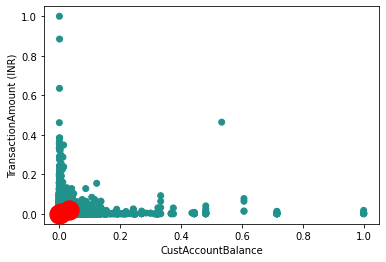

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

X = df[['CustAccountBalance', 'TransactionAmount (INR)']]

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

n_components = 3
gmm = GaussianMixture(n_components=n_components)
gmm.fit(X)

centroids = gmm.means_
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300, linewidths=3,color='r', zorder=10)
plt.xlabel('CustAccountBalance')
plt.ylabel('TransactionAmount (INR)')
plt.show()


# Implementacion sin librerias

C:\Users\charl\AppData\Local\Temp\ipykernel_20072\3054066444.py:16: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(p))
C:\Users\charl\AppData\Local\Temp\ipykernel_20072\3054066444.py:43: RuntimeWarning: invalid value encountered in scalar subtract
  if np.abs(loglik - loglik_old) < tol:
C:\Users\charl\AppData\Local\Temp\ipykernel_20072\3054066444.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  pdf1 = (1 / np.sqrt(2 * np.pi * sig1**2)) * np.exp(-(x - mu1)**2 / (2 * sig1**2))
C:\Users\charl\AppData\Local\Temp\ipykernel_20072\3054066444.py:9: RuntimeWarning: divide by zero encountered in divide
  pdf1 = (1 / np.sqrt(2 * np.pi * sig1**2)) * np.exp(-(x - mu1)**2 / (2 * sig1**2))
C:\Users\charl\AppData\Local\Temp\ipykernel_20072\3054066444.py:9: RuntimeWarning: invalid value encountered in divide
  pdf1 = (1 / np.sqrt(2 * np.pi * sig1**2)) * np.exp(-(x - mu1)**2 / (2 * sig1**2))
C:\Users\charl\AppData\Local\Temp\ipykernel_20072\3054066444.py:9: R

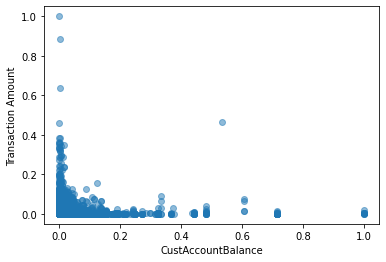

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = df[['CustAccountBalance', 'TransactionAmount (INR)']].values


def mixture_pdf(x, mu1, mu2, sig1, sig2, w1):
    pdf1 = (1 / np.sqrt(2 * np.pi * sig1**2)) * np.exp(-(x - mu1)**2 / (2 * sig1**2))
    pdf2 = (1 / np.sqrt(2 * np.pi * sig2**2)) * np.exp(-(x - mu2)**2 / (2 * sig2**2))
    return w1 * pdf1 + (1 - w1) * pdf2


def log_likelihood(x, mu1, mu2, sig1, sig2, w1):
    p = mixture_pdf(x, mu1, mu2, sig1, sig2, w1)
    return np.sum(np.log(p))


def fit_mixture_model(x, n_iter=100, tol=1e-6):

    mu1 = np.mean(x)
    mu2 = np.mean(x) + np.std(x)
    sig1 = np.std(x)
    sig2 = np.std(x)
    w1 = 0.5
    loglik_old = -np.inf


    for i in range(n_iter):

        p1 = mixture_pdf(x, mu1, mu2, sig1, sig2, w1)
        p2 = mixture_pdf(x, mu2, mu1, sig2, sig1, 1 - w1)
        w1 = np.mean(p1) / (np.mean(p1) + np.mean(p2))


        mu1 = np.sum(p1 * x) / np.sum(p1)
        mu2 = np.sum(p2 * x) / np.sum(p2)
        sig1 = np.sqrt(np.sum(p1 * (x - mu1)**2) / np.sum(p1))
        sig2 = np.sqrt(np.sum(p2 * (x - mu2)**2) / np.sum(p2))


        loglik = log_likelihood(x, mu1, mu2, sig1, sig2, w1)
        if np.abs(loglik - loglik_old) < tol:
            break
        loglik_old = loglik

    return mu1, mu2, sig1, sig2, w1


mu1, mu2, sig1, sig2, w1 = fit_mixture_model(X)


Y = df['CustGender'].values

plt.scatter(X[:,0], X[:,1], alpha=0.5)
plt.scatter(Y, X[:,1], alpha=0.5)
plt.xlabel('CustAccountBalance')
plt.ylabel('Transaction Amount')
plt.show()
